In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [7]:
df = pd.read_csv("amz_uk.csv")

df

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


Objective: Understand the relationship between product categories and their best-seller status.

Crosstab Analysis:

1. Create a crosstab between the product category and the isBestSeller status.
2. Are there categories where being a best-seller is more prevalent?

Hint: one option is to calculate the proportion of best-sellers for each category and then sort the categories based on this proportion in descending order.

Statistical Tests:

3. Conduct a Chi-square test to determine if the best-seller distribution is independent of the product category.
4. Compute Cramér's V to understand the strength of association between best-seller status and category.

Visualizations:

5. Visualize the relationship between product categories and the best-seller status using a stacked bar chart.

In [35]:
df.category.value_counts()

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
                                           ...  
Alexa Built-In Devices                       107
Motorbike Chassis                            107
Plugs                                        107
Smart Home Security & Lighting               104
Smart Speakers                                54
Name: count, Length: 296, dtype: int64

In [53]:
crosstab_result = pd.crosstab(df['isBestSeller'], df['category'])

proportion_best_sellers = (crosstab_result.div(crosstab_result.sum(axis=1), axis=0) * 100).T
sorted_categories = proportion_best_sellers[True].sort_values(ascending=False)

sorted_categories

category
Grocery                        6.967419
Health & Personal Care         6.917293
Baby                           4.273183
Sports & Outdoors              4.135338
Power & Hand Tools             3.834586
                                 ...   
Downhill Ski Boots             0.000000
Digital Frames                 0.000000
Motorbike Chassis              0.000000
Motorbike Drive & Gears        0.000000
eBook Readers & Accessories    0.000000
Name: True, Length: 296, dtype: float64

In [45]:
from scipy.stats import chi2_contingency

chi2_statistic, chi2_p_value, _, _ = chi2_contingency(crosstab_result)

chi2_statistic, chi2_p_value

(36540.20270061387, 0.0)

In [46]:
from scipy.stats.contingency import association

association(crosstab_result, method="cramer")

# This suggests a weak association between the two variables. 

0.1222829439760564

<Axes: xlabel='category'>

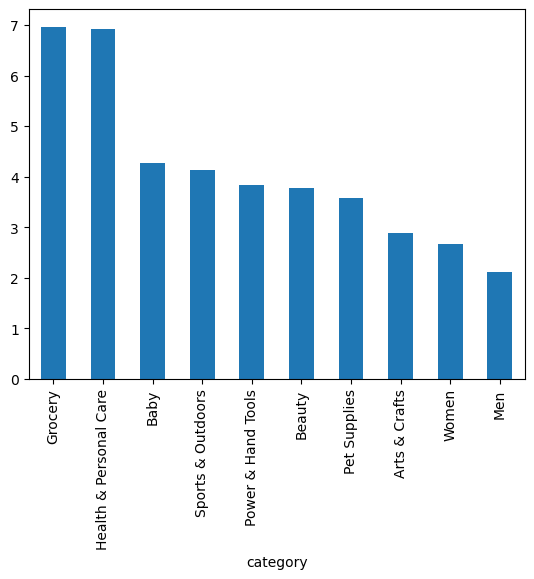

In [49]:
sorted_categories.head(10).plot(kind="bar", stacked=True)

Objective: Investigate how different product categories influence product prices.

Preliminary Step: Remove outliers in product prices.

1. For this purpose, we can use the IQR (Interquartile Range) method. Products priced below the first quartile minus 1.5 times the IQR or above the third quartile plus 1.5 times the IQR will be considered outliers and removed from the dataset. The next steps will be done with the dataframe without outliers.

Hint: you can check the last Check For Understanding at the end of the lesson EDA Bivariate Analysis for a hint on how to do this.

Violin Plots:

2. Use a violin plot to visualize the distribution of price across different product categories. Filter out the top 20 categories based on count for better visualization.
3. Which product category tends to have the highest median price? Don't filter here by top categories.

Bar Charts:

4. Create a bar chart comparing the average price of products for the top 10 product categories (based on count).
5. Which product category commands the highest average price? Don't filter here by top categories.

Box Plots:

6. Visualize the distribution of product ratings based on their category using side-by-side box plots. Filter out the top 10 categories based on count for better visualization.
7. Which category tends to receive the highest median rating from customers? Don't filter here by top categories.

Objective: Analyze how product ratings (stars) correlate with product prices.

Correlation Coefficients:

1. Calculate the correlation coefficient between price and stars.
2. Is there a significant correlation between product price and its rating?

Visualizations:

3. Use a scatter plot to visualize the relationship between product rating and price. What patterns can you observe?
4. Use a correlation heatmap to visualize correlations between all numerical variables.
5. Examine if product prices typically follow a normal distribution using a QQ plot.